In [1]:
!pip install graphviz==0.13
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
import pandas as pd
import numpy as np
import graphviz
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler

In [0]:
np.random.seed(5)

In [4]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
# path = './05_car_prices.csv'
dados = pd.read_csv(uri)
dados.head()

Unnamed: 0  mileage_per_year  model_year      price sold
0           0             21801        2000   30941.02  yes
1           1              7843        1998   40557.96  yes
2           2              7109        2006   89627.50   no
3           3             26823        2015   95276.14   no
4           4              7935        2014  117384.68  yes

In [5]:
dados = dados.rename(columns={
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
})

dados.vendido = dados.vendido.map({'no': 0, 'yes': 1})
dados['idade_do_modelo'] = datetime.today().year - dados.ano_do_modelo
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados = dados.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1)
dados.head()

preco  vendido  idade_do_modelo   km_por_ano
0   30941.02        1               20  35085.22134
1   40557.96        1               22  12622.05362
2   89627.50        0               14  11440.79806
3   95276.14        0                5  43167.32682
4  117384.68        1                6  12770.11290

In [15]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, test_size=0.25)

model = DecisionTreeClassifier(max_depth=3)
model.fit(train_x, train_y)
score = model.score(test_x, test_y) * 100
print('Decision Tree Score: %.2f%%' % score)

Decision Tree Score: 78.08%


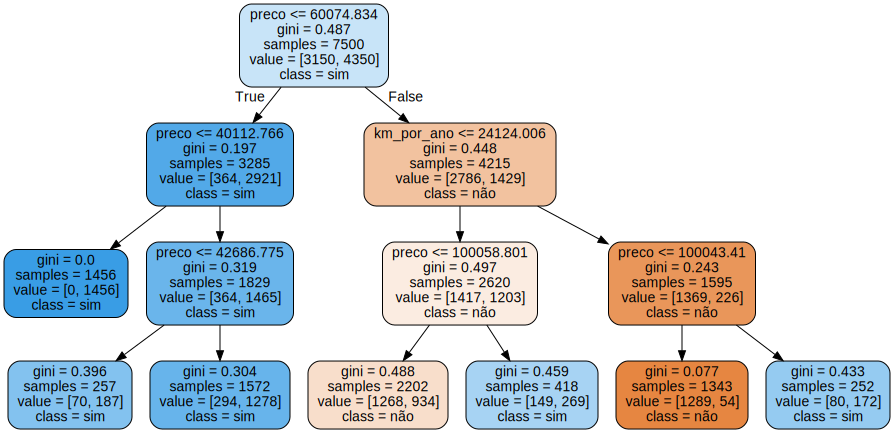

In [16]:
features = x.columns
dot_data = export_graphviz(model, 
                           out_file=None, 
                           feature_names=features,
                           filled=True,
                           rounded=True,
                           class_names=['não', 'sim']
                           )
source = graphviz.Source(dot_data)
source